In [1]:
import os
import glob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datapipeline

<br>

# Extract images metadata as features

In [2]:
train_imgs_dir = "FER/train/"
test_imgs_dir = "FER/test/"

# Labels for emotion_class
emotions = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 
            'sad': 4, 'surprise': 5, 'neutral': 6}

emotions_keys = list(emotions.keys())

In [ ]:
# Get all subfolder paths for train and test
train_subfolders = []
test_subfolders = []

for idx in range(len(emotions)):
    train_subfolders.append(train_imgs_dir + emotions_keys[idx] + "/")
    test_subfolders.append(test_imgs_dir + emotions_keys[idx] + "/")


# From both train and test folders, extract features from each image
all_data_list = []

for folder in [train_subfolders, test_subfolders]:
    folder_type = folder[0].split("/")[1]

    for emotion_subfolder in folder:
        img_paths_list = [img_path for img_path in 
                            glob.glob(emotion_subfolder + "*.jpg")]
        emotion_class_key = emotion_subfolder.split("/")[2]
        emotion_class = emotions[emotion_class_key]

        for img_path in img_paths_list:
            features = datapipeline.get_image_features(img_path, emotion_class)
            all_data_list.append(features)


# Create dataframe for all images
col_names = ["emotion_class", "approx_brightness", "pixel_median", "pixel_std", 
             "percent_distinct_pix", "img_path", "pixel_values"]

data_df = pd.DataFrame(all_data_list, columns=col_names)

<br>

# Read the images csv (export if none)

In [3]:
# Either export the dataframe or read it
if os.path.exists("FER/all_data.csv"):
    data_df = pd.read_csv("FER/all_data.csv")
else:
    data_df.to_csv("FER/all_data.csv", index=False)

In [4]:
data_df.head()

,emotion_class,approx_brightness,pixel_median,pixel_std,percent_distinct_pix,img_path,pixel_values
0,0,163.224511,171,41.248204,0.816406,FER/train/angry/Training_35668808.jpg,"[181, 179, 177, 175, 175, 175, 173, 171, 169, ..."
1,0,161.247751,157,60.611969,0.937500,FER/train/angry/Training_92439792.jpg,"[21, 18, 27, 71, 86, 81, 89, 107, 112, 123, 16..."
2,0,113.609107,101,47.038819,0.820312,FER/train/angry/Training_41634629.jpg,"[41, 63, 85, 94, 90, 81, 98, 111, 108, 104, 11..."
3,0,73.288140,68,24.451276,0.531250,FER/train/angry/Training_78260987.jpg,"[50, 51, 51, 49, 56, 81, 73, 56, 42, 39, 38, 3..."
4,0,99.689185,62,61.623063,0.925781,FER/train/angry/Training_23736738.jpg,"[41, 35, 28, 19, 27, 27, 23, 25, 29, 26, 19, 3..."


<br>

# EDA & clean up

### 1. Drop duplicates

In [5]:
data = data_df.copy()

# Drop duplicates
duplicate_mask = data["pixel_values"].duplicated()
duplicate_idx = data.loc[duplicate_mask].index
data.drop(duplicate_idx, axis=0, inplace=True)

print("# duplicated rows: {}".format(duplicate_mask.sum()))

# duplicated rows: 1853


### 2. Check emotion_class counts

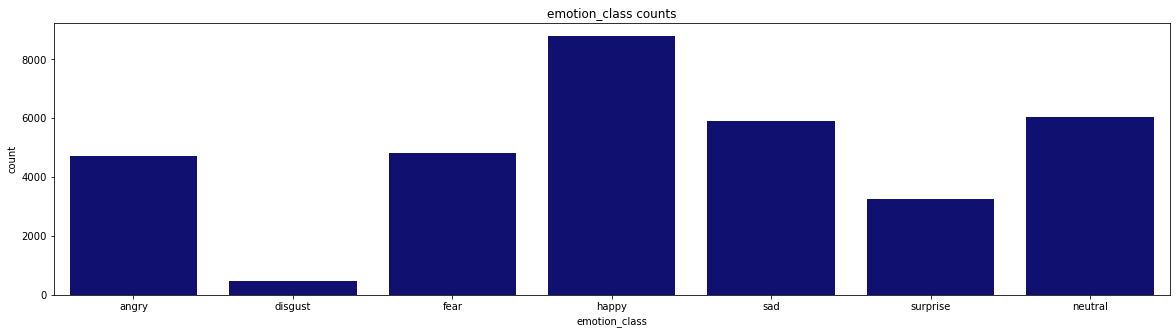

In [6]:
emotions = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 
            'sad': 4, 'surprise': 5, 'neutral': 6}
emotions_keys = list(emotions.keys())


# Check emotion_class counts
fig, ax = plt.subplots(figsize=(20,5))

sns.countplot(data=data, x='emotion_class', color="navy")\
                .set_title('emotion_class counts');
ax.set_xticklabels(emotions_keys);

### 3. Check distributions of approx_brightness per class

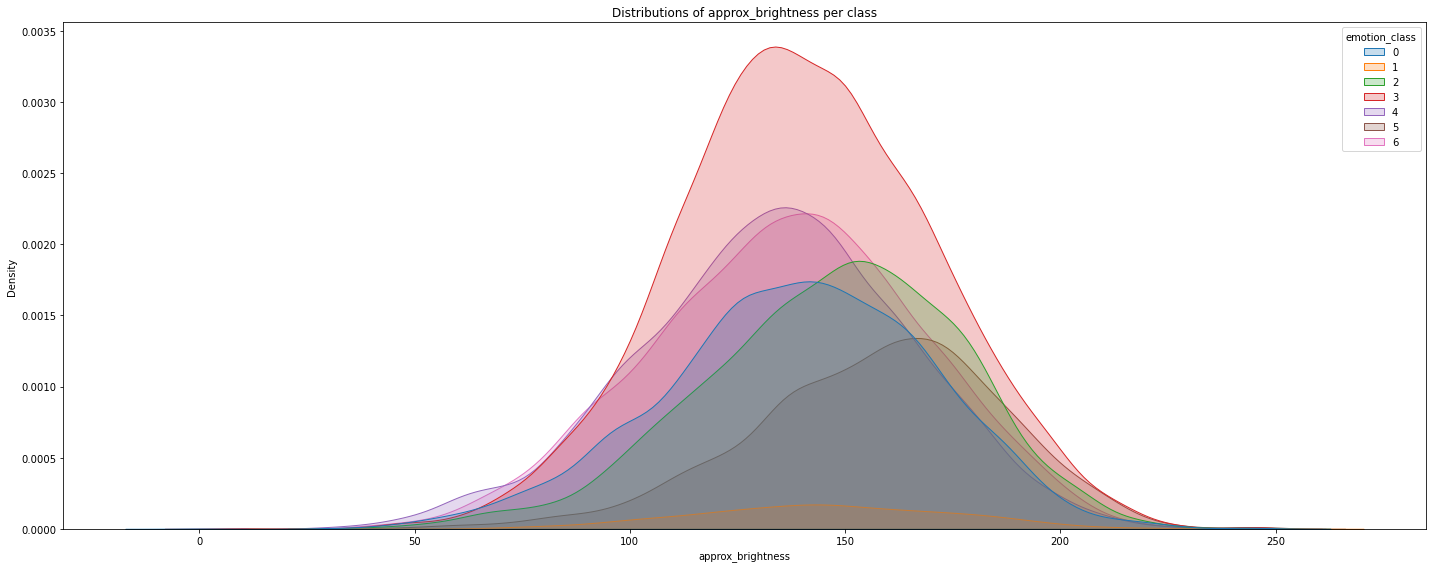

In [7]:
# Check distributions of approx_brightness per class

fig, axes = plt.subplots(figsize=(20,8))
sns.kdeplot(data=data, 
            x='approx_brightness', 
            shade=True,
            palette="tab10",
            legend=True,
            hue="emotion_class")\
                .set_title("Distributions of approx_brightness per class")
    
plt.tight_layout(); 

### 4. Check distributions of pixel_median per class

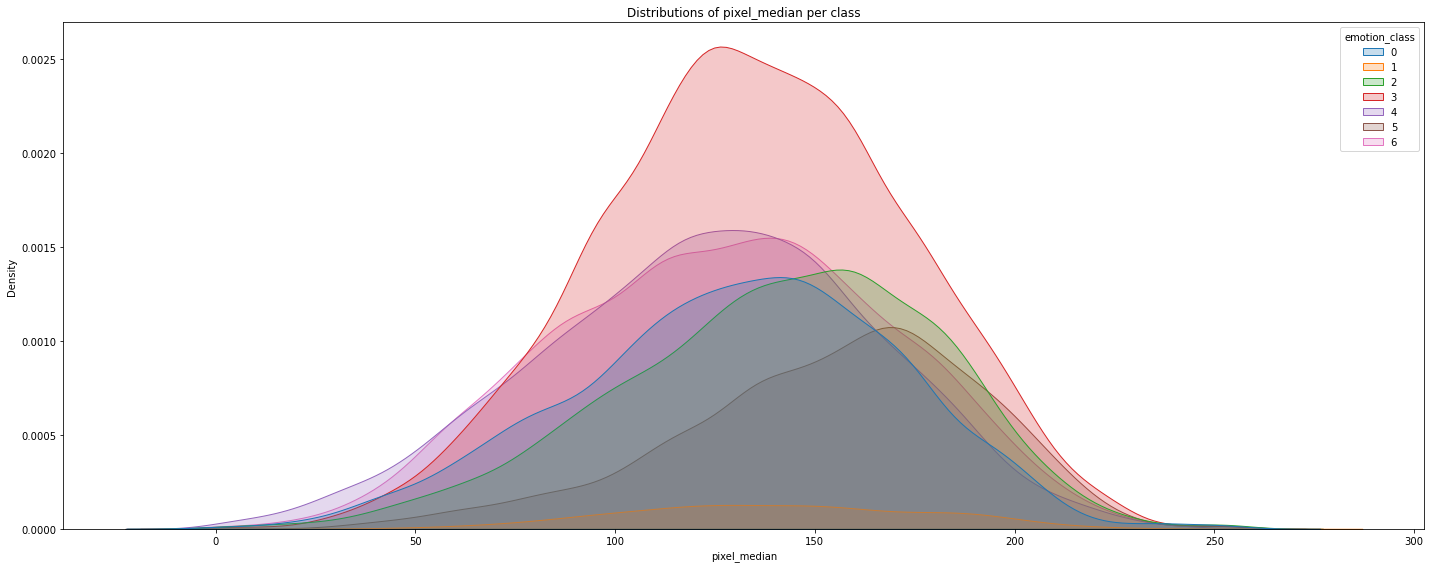

In [8]:
# Check distributions of pixel_median per class

fig, axes = plt.subplots(figsize=(20,8))
sns.kdeplot(data=data, 
            x='pixel_median', 
            shade=True,
            palette="tab10",
            legend=True,
            hue="emotion_class")\
                .set_title("Distributions of pixel_median per class")
    
plt.tight_layout(); 

### 5. Check distributions of pixel_std per class

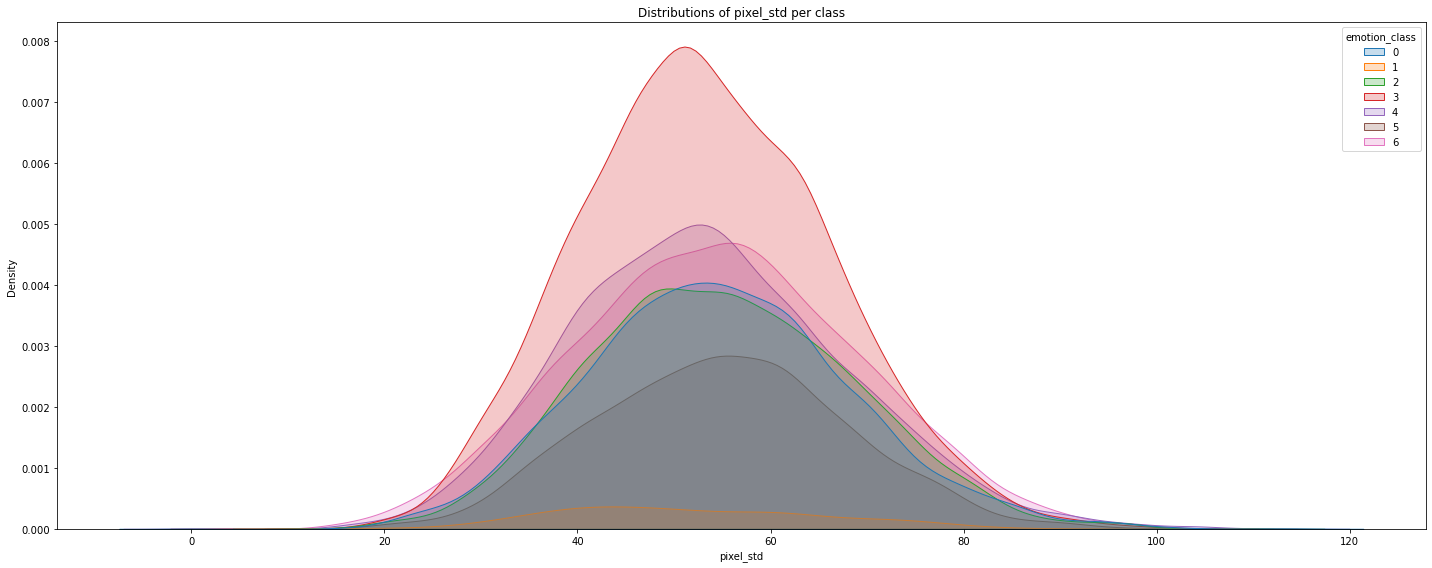

In [9]:
# Check distributions of pixel_std per class

fig, axes = plt.subplots(figsize=(20,8))
sns.kdeplot(data=data, 
            x='pixel_std', 
            shade=True,
            palette="tab10",
            legend=True,
            hue="emotion_class")\
                .set_title("Distributions of pixel_std per class")
    
plt.tight_layout(); 

### 6. Check distributions of percent_distinct_pix per class

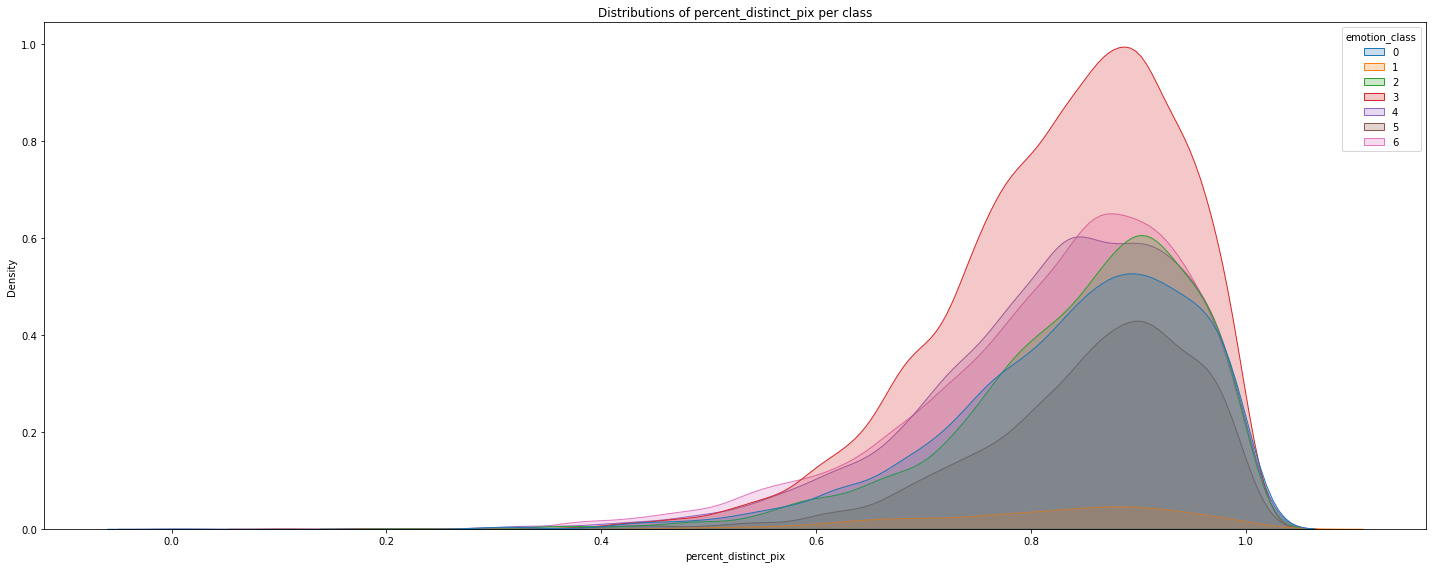

In [10]:
# Check distributions of percent_distinct_pix per class

fig, axes = plt.subplots(figsize=(20,8))
sns.kdeplot(data=data, 
            x='percent_distinct_pix', 
            shade=True,
            palette="tab10",
            legend=True,
            hue="emotion_class")\
                .set_title("Distributions of percent_distinct_pix per class")
    
plt.tight_layout(); 

### 7. Peek images which are relatively posterized

21


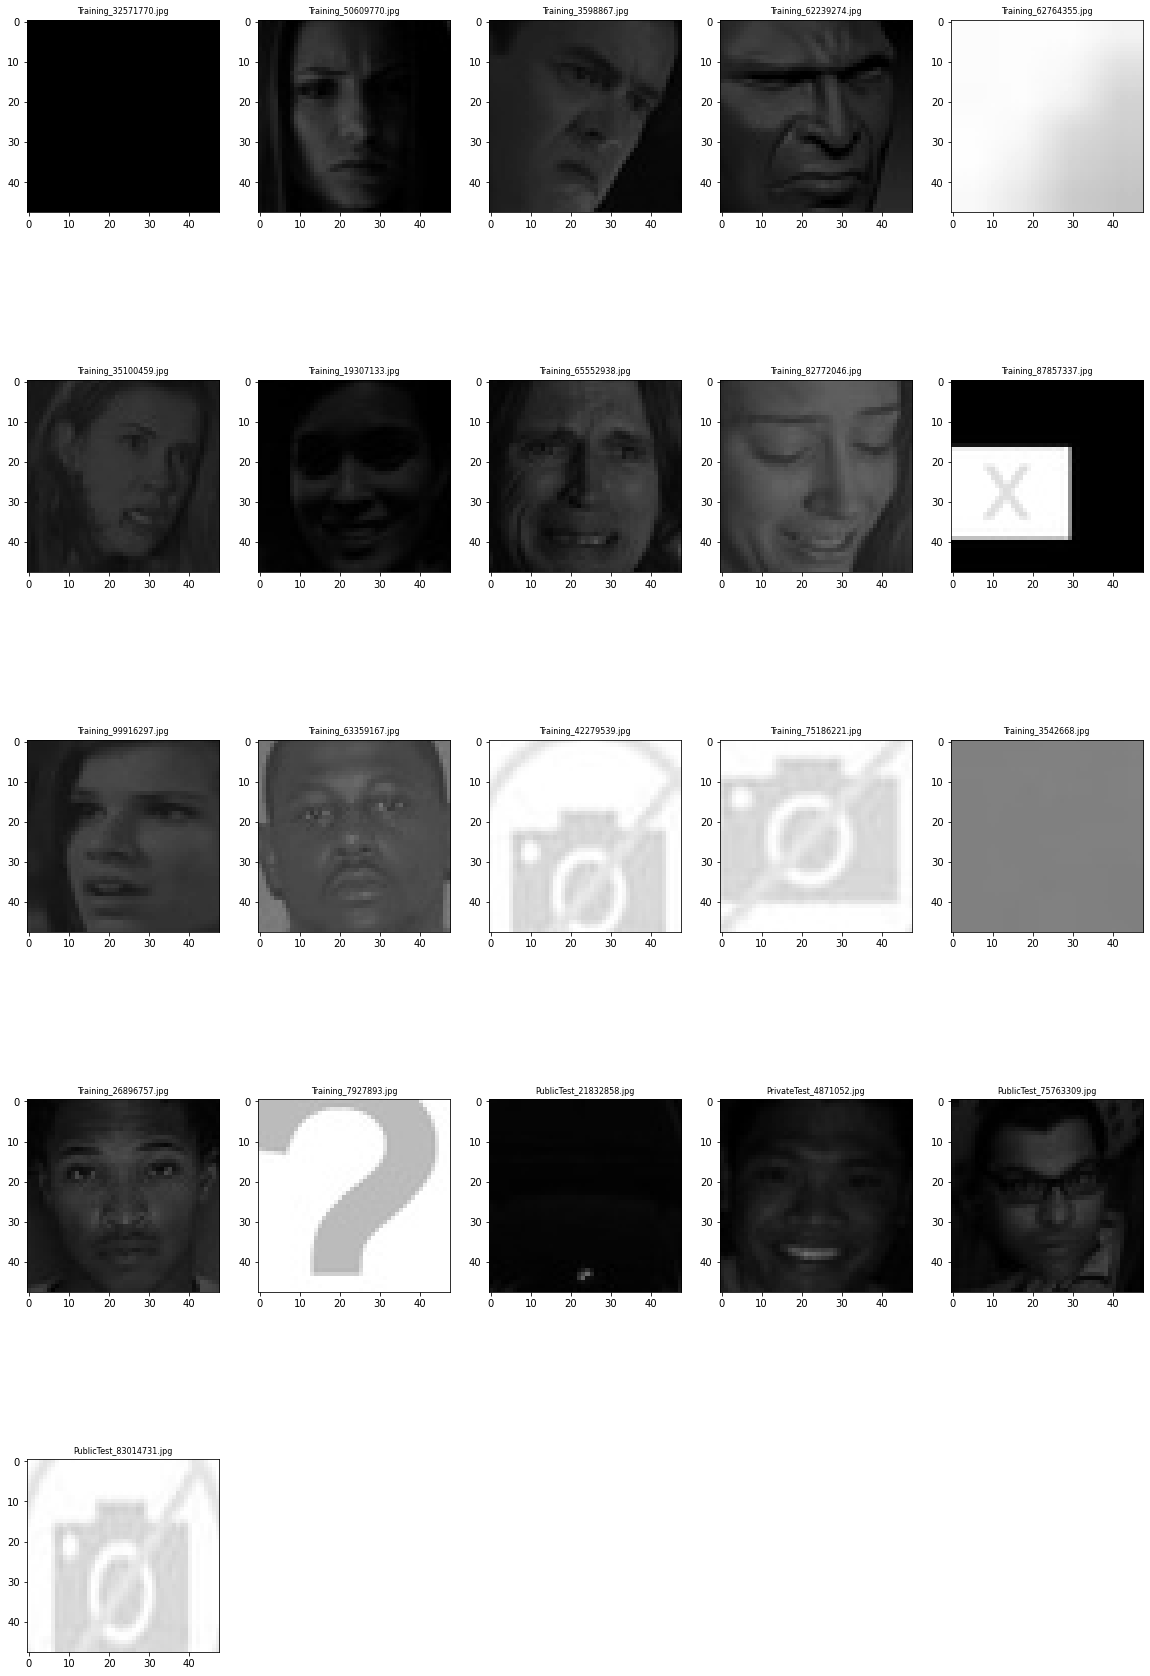

In [19]:
images_to_peek_paths = list(data[(data["percent_distinct_pix"] <= 0.3) ] ["img_path"])
print(len(images_to_peek_paths))

img_pil_list = datapipeline.convert_image_paths_to_pil(images_to_peek_paths)
datapipeline.display_greyscale_images(img_pil_list, max_images=len(img_pil_list))

posterized_img_paths = images_to_peek_paths

### 8. Peek images which are mostly dark

18


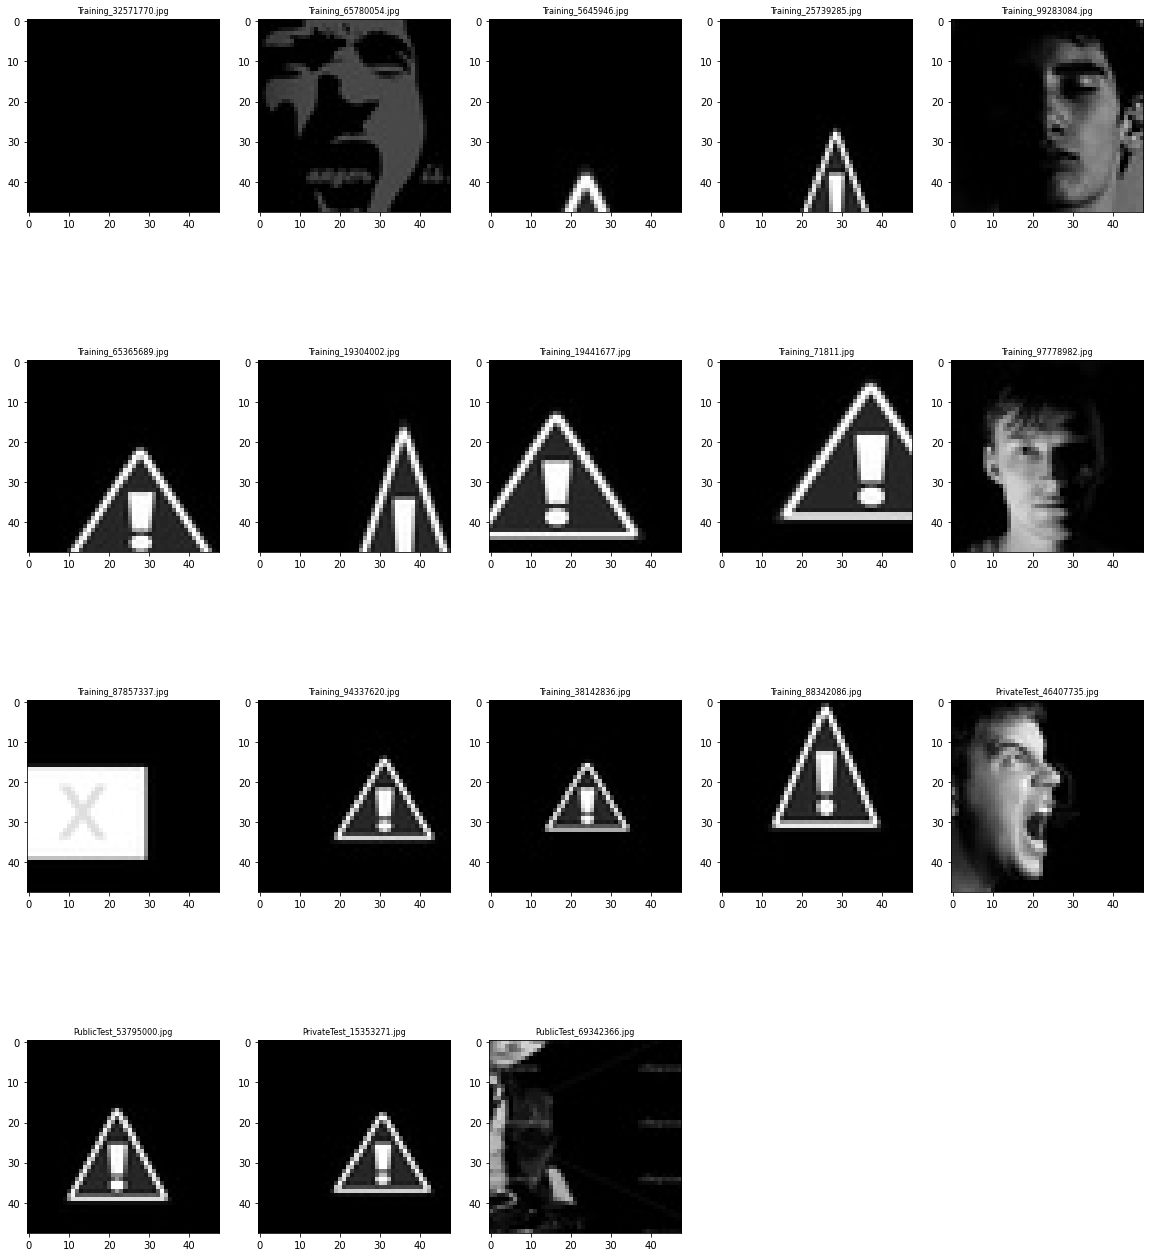

In [11]:
images_to_peek_paths = list(data[(data["pixel_median"] <= 2)] ["img_path"])
print(len(images_to_peek_paths))

img_pil_list = datapipeline.convert_image_paths_to_pil(images_to_peek_paths)
datapipeline.display_greyscale_images(img_pil_list, max_images=len(img_pil_list))

dark_img_paths = images_to_peek_paths

### 9. Peek images which are mostly light

78


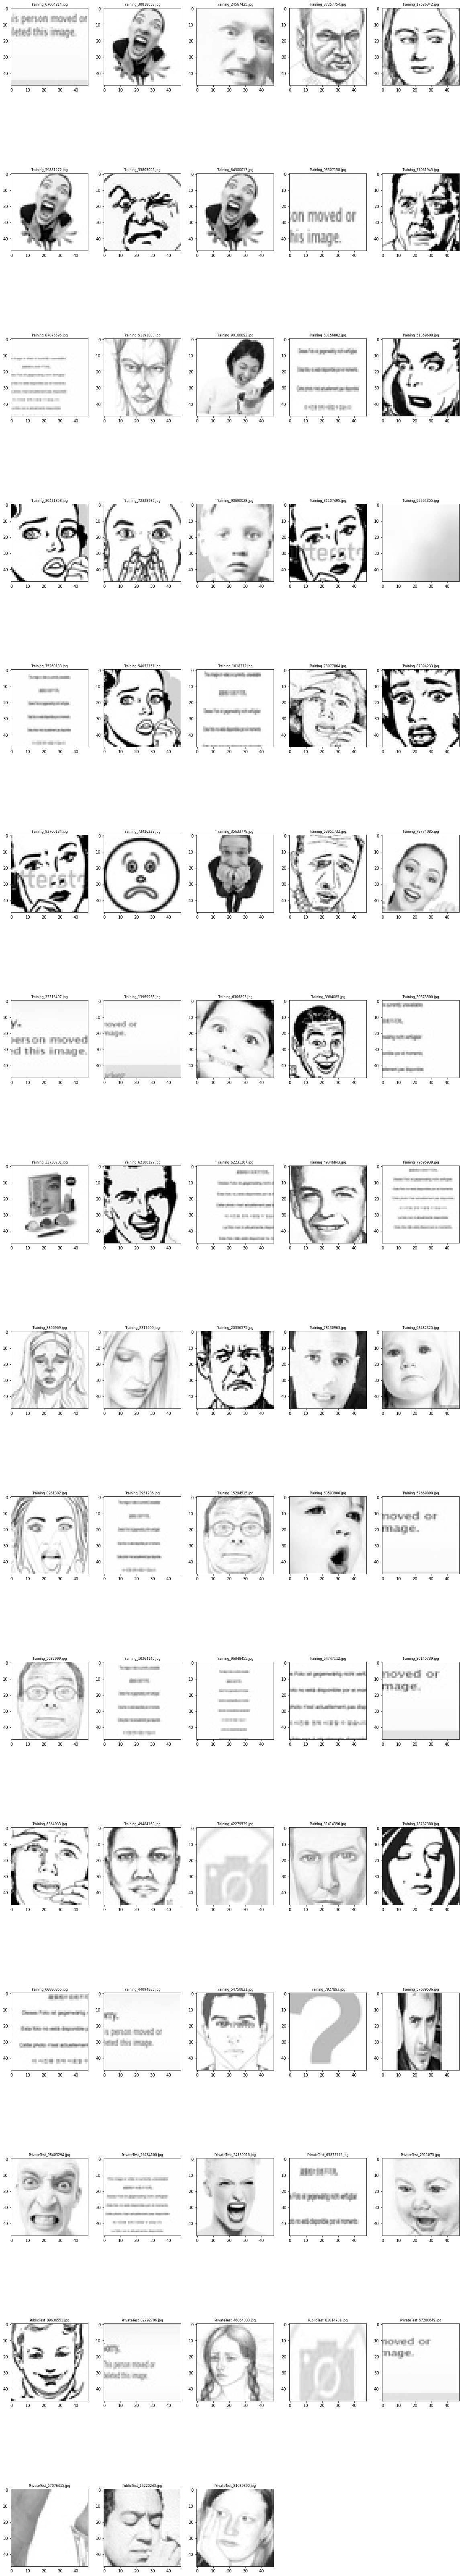

In [12]:
images_to_peek_paths = list(data[(data["pixel_median"] >= 238) ] ["img_path"])
print(len(images_to_peek_paths))

img_pil_list = datapipeline.convert_image_paths_to_pil(images_to_peek_paths)
datapipeline.display_greyscale_images(img_pil_list, max_images=len(img_pil_list))

light_img_paths = images_to_peek_paths

<br>

# Observations

- 1853 images are of duplicated pixels
- When we display relatively posterized images, we find images with:
    - Cartoonized facial expressions
    - Texts on white backgrounds (no face)
        - Such images have mostly either a very light or dark background
    - Images showing UI elements (no face)
        - Such images have mostly either a very light or dark background

<br>

# Actionables

- Remove the 1853 duplicated images 
- Remove images with no face and light background
- Remove images with no face and dark background 

<br>

In [ ]:
# fig, axes = plt.subplots(4, 2, figsize=(20,20))
# axes = axes.flatten()

# for idx in range(len(emotions)):
#     sns.kdeplot(data=data[data["emotion_class"]==idx], 
#                 x='approx_brightness', 
#                 shade=True,
#                 color="navy", ax=axes[idx])#.set_title('Validation')
#     axes[idx].set_title("some")


# plt.tight_layout(); 

# # # Check emotion_class counts
# # fig, ax = plt.subplots(figsize=(20,5))

# # sns.kdeplot(data=data, x='approx_brightness', color="blue", shade=True).set_title('emotion_class counts');

# # #sns.countplot(data = data, x='approx_brightness')\
# # #ax.set_xticklabels(list(emotions.keys()));
